<a href="https://colab.research.google.com/github/maiali13/ML-Cookbook/blob/master/DBSCAN_Recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS Build Week 1

[Project Repo](https://github.com/maiali13/ML-Cookbook)

## Imports

In [ ]:
# DBSCAN from scratch
import pandas as pd
import numpy as np
import math

# for testing alg
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn import datasets

## DBSCAN from Scratch


**Density-Based Spatial Clustering of Applications with Noise**

Lucky for me, [wiki](https://en.wikipedia.org/wiki/DBSCAN) has a very nice pseudocode breakdown of this algorithm already. I am going to follow the framework and labeling of the DBSCAN algorithm in the 'official' SK-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). I will also follow SK-learn's recommendations on default settings for parameters. 



In [ ]:
# initialize class

class xDBSCAN:
  """
  Density-Based Spatial Clustering of Applications with Noise
  -----------------------------------------------------------
  a clustering method for unsupervised learning
  
  Parameters
  ----------
  eps: (float, default=0.5) 
    epsilon; the distance threshold between two points in the same neighborhood

  min_samples: (int, default=5)
    the number of samples within a point's nighborhood required for it to be
    weighted as a core point for clustering

  (these two parameters determine cluster density)
  """
  def __init__(self, eps=0.5, min_samples=5):
    self.eps = eps
    self.min_samples = min_samples
    # self.data = None #the dataset
    self.clusters = [] # list of cluster arrays containing point indeces
    self.neighbors = {} # hash dict of {"point": [neighbor1, neighbor2, ...]}

  def get_neighbors(self, X, y):
    """
    finds a point's epsilon neighbors via calculating euclidian distance/L² norm
    between the datapoints
    returns a list of all neighboring points
    """
    neighbors = np.where(np.linalg.norm(X[y] - X, axis=1) < self.eps)[0]
    return np.array(neighbors) #might need to remove np.array and just return neigbors

  def fit(self, X):
    """
    perform clustering on the dataset
    returns self
    
    Parameters
    ----------
    X: (array or array-like)
      feature array of points to cluster
    """
    C = 0 # cluster counter C
    n_points = len(X) # number of data points
    self.clabels = np.zeros(n_points, dtype=int) # define empty label list, initially all labels are 0
        
    for y in range(n_points): #for each point in our input data, do the following:
        if self.clabels[y] != 0: # if it alraedy has a label, skip
              continue
            
        neighbors = self.get_neighbors(X, y) #find neighbors 

        if len(neighbors) < self.min_samples: # if the number of neighboring points is less than min_samples (aka not densley surrounded)
            self.clabels[y] = -1 # label that point as noise 
            continue
        
        # when data point isnt noise  
        C += 1 # move onto the next cluster label
        self.clabels[y] = C # assign new cluster label

        # for each point not yes considerd:
        # determine points and their unclaimed neighbors in order to discover and expand clusters
        i = 0 
        while i < len(neighbors):

          neighbor_y = int(neighbors[i]) # creating a new cluster

          if self.clabels[neighbor_y] == -1: # label new sparse points as noise
            self.clabels[neighbor_y] = C
                
          elif self.clabels[neighbor_y] == 0: # skip if already labelled/processed, otherwise add to cluster
            self.clabels[neighbor_y] = C
            new_neighbors = self.get_neighbors(X, neighbor_y) # get neighbors of point
                    
            if len(new_neighbors) >= self.min_samples:  # if the number of neighboring points is higher than min_samples (aka densley surrounded)
              neighbors = np.append(neighbors, new_neighbors) # exand the cluster with the newly found neighbors

          i += 1 # iterate on for all remaining unconsidered points



## Testing & Graphs

going to test on toy data from SK-Learn


In [ ]:
# imported data for graphing - SK Learn

samples = 1200

# moons
parabolas = datasets.make_moons(n_samples= samples, noise=0.055)

#circles
circles = datasets.make_circles(n_samples= samples, factor=0.5, noise=0.055)

In [ ]:
# create ccustom color map

colors = ['firebrick', 'plum','darkorchid', 'mediumslateblue', 'navy', 'cornflowerblue', 'lightskyblue', 
          'mediumseagreen', 'palegreen', 'gold', 'darkorange']

cinverted = ['indigo', 'lightskyblue', 'mediumseagreen', 'gold', 'orangered', 'coral', 'firebrick', 'plum', 
            'navy', 'cornflowerblue']

invert2 = ['indigo', 'lightskyblue', 'mediumseagreen', 'gold',  'coral', 'firebrick', 'plum', 
            'navy', 'cornflowerblue']

ylwblu = ['#CAF270', '#73D487','#30B096', '#288993', '#40607A', '#453B52']
simple = ['#E76BF3', '#00B0F6', '#00BF7D', '#FBF2D4','#F8877F']

ccmap = matplotlib.colors.ListedColormap(invert2)

In [ ]:
skl_datasets = [parabolas, circles]

def plot_skl(skl_datasets):
  plt.figure(figsize=(20,25))
  plot_num = 1
  for i, skl_datasets in enumerate(skl_datasets):
    X, y = skl_datasets
    plt.subplot(len(skl_datasets),len(skl_datasets), i+1)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=ccmap)

In [ ]:
#plot_skl(skl_datasets)

In [ ]:
# DBSCAN from scratch on the test data
test = []

for dataset in skl_datasets:
    X, _ = dataset
    test_ = xDBSCAN(eps=0.1, min_samples=5)
    test_.fit(X)
    labels = test_.clabels
    test.append((X, labels))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


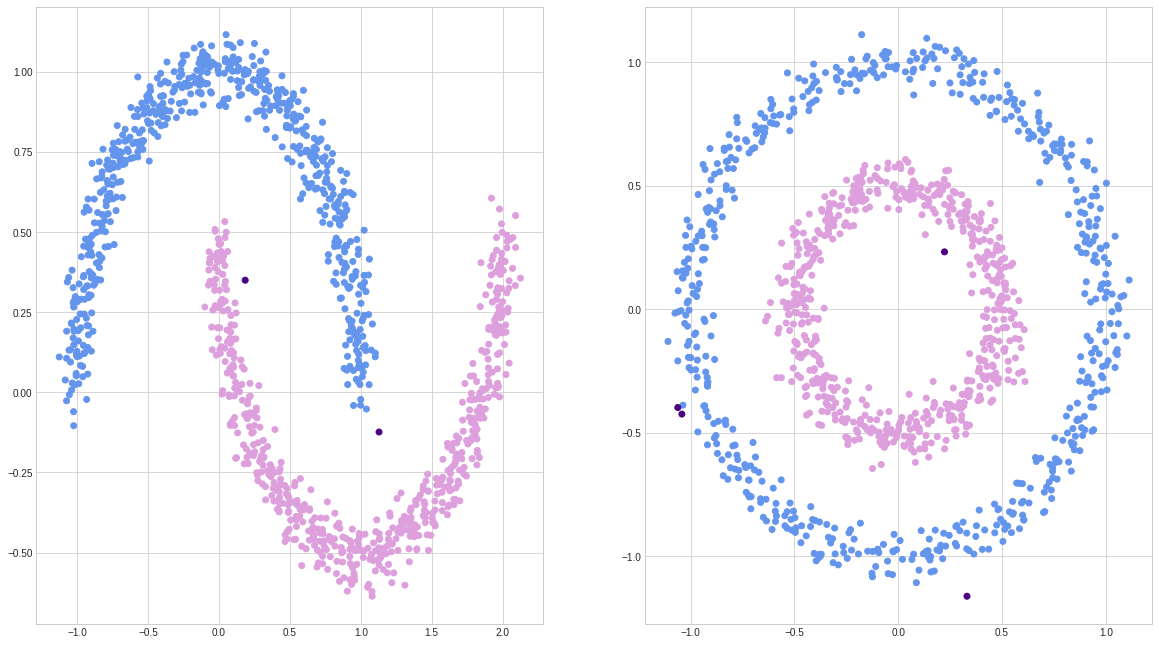

In [ ]:
plot_skl(test)
% time

In [ ]:
# SK-Learn's DBSCAN on the test data
from sklearn.cluster import DBSCAN

last_datasets = []

for dataset in skl_datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.1, min_samples=5)
    db.fit(X)
    labels = db.labels_
    last_datasets.append((X, labels))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


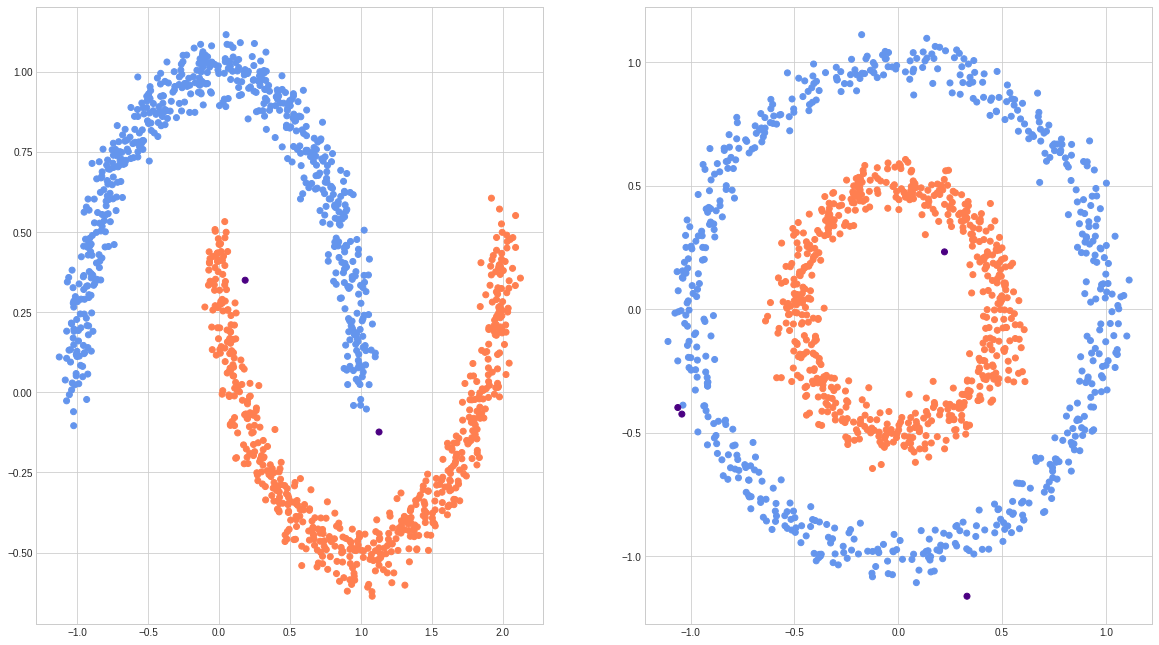

In [ ]:
plot_skl(last_datasets)
%time

In [ ]:
# more imported datasets

# blobs
np.random.seed(42)
blobs = datasets.make_blobs(n_samples= 1000, random_state=42)

# uneven
uneven = datasets.make_blobs(n_samples= 1000, cluster_std=[1.0, 2, 0.5], random_state=42)

# crowd
centers = [[1, 1], [-1, -1], [1, -1]]
crowd = datasets.make_blobs(n_samples= 1300, centers=centers, cluster_std=0.5, random_state=45)

In [ ]:
# blob colors
# create custom color map

colors = ['firebrick', 'plum','darkorchid', 'mediumslateblue', 'navy', 'cornflowerblue', 'lightskyblue', 
          'mediumseagreen', 'palegreen', 'gold', 'darkorange']

cinverted = ['indigo', 'lightskyblue', 'mediumseagreen', 'gold', 'orangered', 'coral', 'firebrick', 'plum', 
            'navy', 'cornflowerblue']

invert2 = ['indigo', 'lightskyblue', 'mediumseagreen', 'gold',  'coral', 'firebrick', 'plum', 
            'navy', 'cornflowerblue']

bcmap = matplotlib.colors.ListedColormap(cinverted)

In [ ]:
blob_datasets = [blobs, uneven]

def plot_skl2(blob_datasets):
  plt.figure(figsize=(20,25))
  plot_num = 1
  for i, blob_datasets in enumerate(blob_datasets):
    X, y = blob_datasets
    plt.subplot(len(blob_datasets),len(blob_datasets), i+1)
    plt.scatter(X[:,0], X[:,1], s= 40, lw= 0, c=y, cmap=bcmap, alpha = 0.7) #, edgecolor='white'
    plt.style.use('seaborn-whitegrid')

In [ ]:
# DBSCAN from scratch on the test data, blobs
blobtest = []

for dataset in blob_datasets:
    X, _ = dataset
    test_ = xDBSCAN(eps=0.6, min_samples=9)
    test_.fit(X)
    labels = test_.clabels
    blobtest.append((X, labels))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


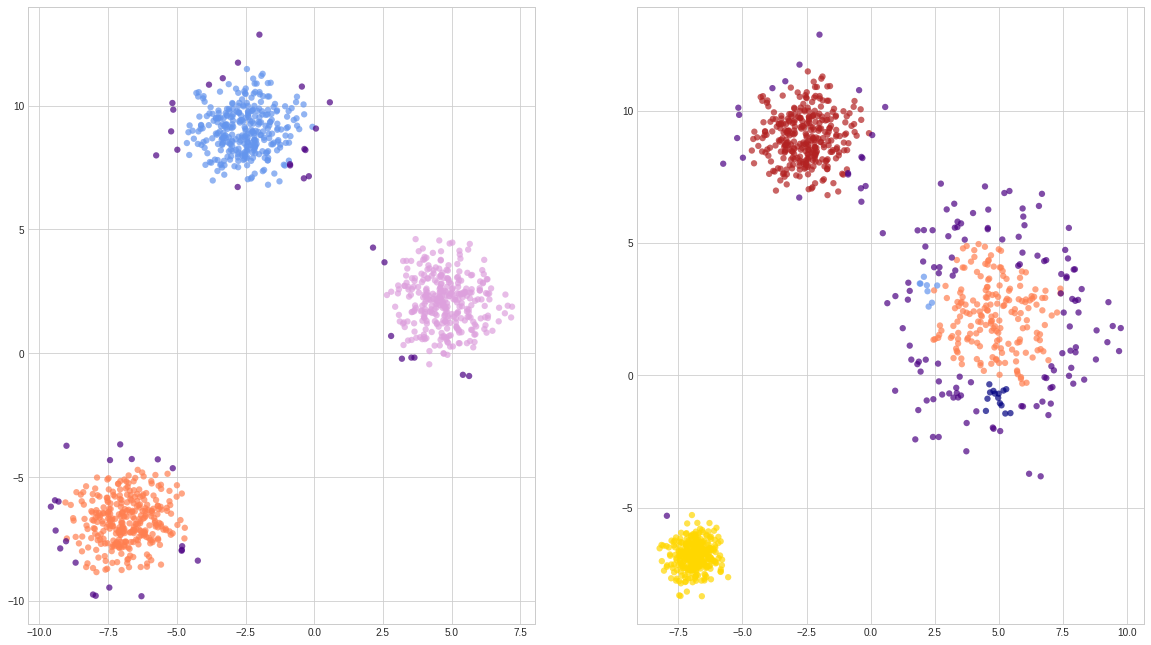

In [ ]:
plot_skl2(blobtest)
%time

In [ ]:
# SK-Learn's DBSCAN on the blobs
blobtest1 = []

for dataset in blob_datasets:
    X, _ = dataset
    db = DBSCAN(eps=0.6, min_samples=9)
    db.fit(X)
    labels = db.labels_
    blobtest1.append((X, labels))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


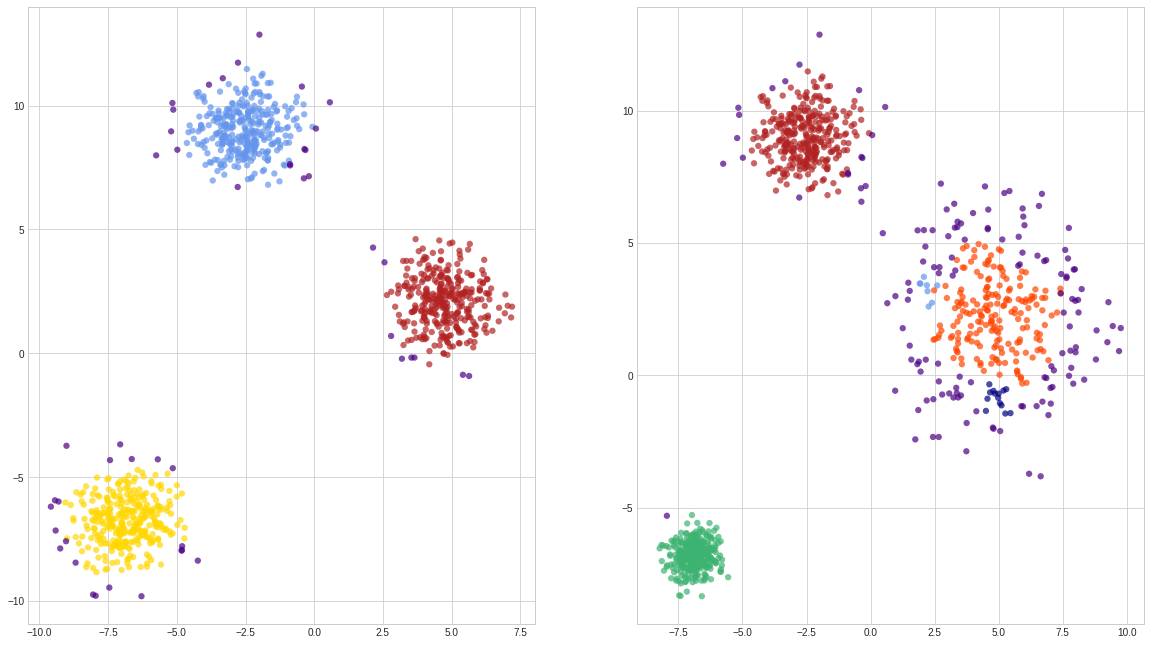

In [ ]:
plot_skl2(blobtest1)
%time

## Illustration of the importance of 'eps' and 'min_samples' parameters

In [ ]:
# imports 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score


In [ ]:
# initialize x and y 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split data into test and train
# sorting ordinal first

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# np.size(X_train,0)

# X_temp = np.concatenate((X_train, np.array([y_train]).T), axis=1)
# X_temp = X_temp[X_temp[:, np.size(X,1)-1].argsort()]
# X_train = np.array([i[:-1] for i in X_temp.tolist()])
# y_train = np.array([i[-1] for i in X_temp.tolist()]).astype(int)

In [ ]:
# DBSCAN without split

eps = 0.75
min_samples = 10
pred1 = DBSCAN(eps= eps, min_samples= min_samples).fit_predict(X)

print(f'DBSCAN with {eps} eps and {min_samples} min samples')
print("\nConfusion Matrix :")
print(confusion_matrix(y, pred1))
print("\nAccuracy Score :")
print(accuracy_score(y, pred1))

DBSCAN with 0.75 eps and 10 min samples

Confusion Matrix :
[[ 0  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 5  0 45  0]]

Accuracy Score :
0.66


In [ ]:
eps = 0.5
min_samples = 10
pred3 = DBSCAN(eps= eps, min_samples= min_samples).fit_predict(X)

print(f'DBSCAN with {eps} eps and {min_samples} min samples')
print("\nConfusion Matrix :")
print(confusion_matrix(y, pred3))
print("\nAccuracy Score :")
print(accuracy_score(y, pred3))

DBSCAN with 0.5 eps and 10 min samples

Confusion Matrix :
[[ 0  0  0  0]
 [ 2 48  0  0]
 [ 6  0 44  0]
 [22  0 28  0]]

Accuracy Score :
0.6133333333333333


In [ ]:
eps = 0.3
min_samples = 10
pred2 = DBSCAN(eps= eps, min_samples= min_samples).fit_predict(X)

print(f'DBSCAN with {eps} eps and {min_samples} min samples')
print("\nConfusion Matrix :")
print(confusion_matrix(y, pred2))
print("\nAccuracy Score :")
print(accuracy_score(y, pred2))

DBSCAN with 0.3 eps and 10 min samples

Confusion Matrix :
[[ 0  0  0  0]
 [20 18 12  0]
 [50  0  0  0]
 [50  0  0  0]]

Accuracy Score :
0.12


In [ ]:
eps = 0.3
min_samples = 5
pred4 = DBSCAN(eps= eps, min_samples= min_samples).fit_predict(X)

print(f'DBSCAN with {eps} eps and {min_samples} min samples')
print("\nConfusion Matrix :")
print(confusion_matrix(y, pred4))
print("\nAccuracy Score :")
print(accuracy_score(y, pred4))

DBSCAN with 0.3 eps and 5 min samples

Confusion Matrix :
[[ 0  0  0  0]
 [13 37  0  0]
 [37  0 12  1]
 [46  0  0  4]]

Accuracy Score :
0.35333333333333333


In [ ]:
eps = 0.75
min_samples = 2
pred4 = DBSCAN(eps= eps, min_samples= min_samples).fit_predict(X)

print(f'DBSCAN with {eps} eps and {min_samples} min samples')
print("\nConfusion Matrix :")
print(confusion_matrix(y, pred4))
print("\nAccuracy Score :")
print(accuracy_score(y, pred4))

DBSCAN with 0.75 eps and 2 min samples

Confusion Matrix :
[[50  0  0]
 [ 0 50  0]
 [ 0 48  2]]

Accuracy Score :
0.68


##Comparing DBSCAN to K-Means

### SK-Learn toy datasets

for blog post

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
import matplotlib.colors

In [ ]:
# create custom color map

colors = ['firebrick', 'plum','darkorchid', 'mediumslateblue', 'navy', 'cornflowerblue', 'lightskyblue', 
          'mediumseagreen', 'palegreen', 'gold', 'darkorange', 'coral']

cinverted = ['indigo', 'lightskyblue', 'mediumseagreen', 'gold', 'orangered', 'coral', 'firebrick', 'plum', 
            'navy', 'cornflowerblue']

ylwblu = ['#CAF270', '#73D487','#30B096', '#288993', '#40607A', '#453B52']
simple = ['#E76BF3', '#00B0F6', '#00BF7D', '#FBF2D4','#F8877F']
ccmap = matplotlib.colors.ListedColormap(cinverted)

In [ ]:
np.random.seed(1311)

# blobs dataset
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

#circles dataset
dataset2 = datasets.make_circles(n_samples=1200, factor=.5, noise=.055)[0]

# plot clustering output of the two datasets
def viz_plots(set1, set2, colors1 = 'gray', colors2 = 'gray', title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    ax1.set_title(title1, fontsize= 14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1], s= 40, lw= 0, c= colors1, cmap = ccmap, alpha = .7, edgecolor='white')

    ax2.set_title(title2, fontsize= 14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1], s= 45, lw= 0, c= colors2, cmap = ccmap, alpha = .7)

    fig.tight_layout()
    plt.style.use('seaborn-whitegrid')
    plt.show()

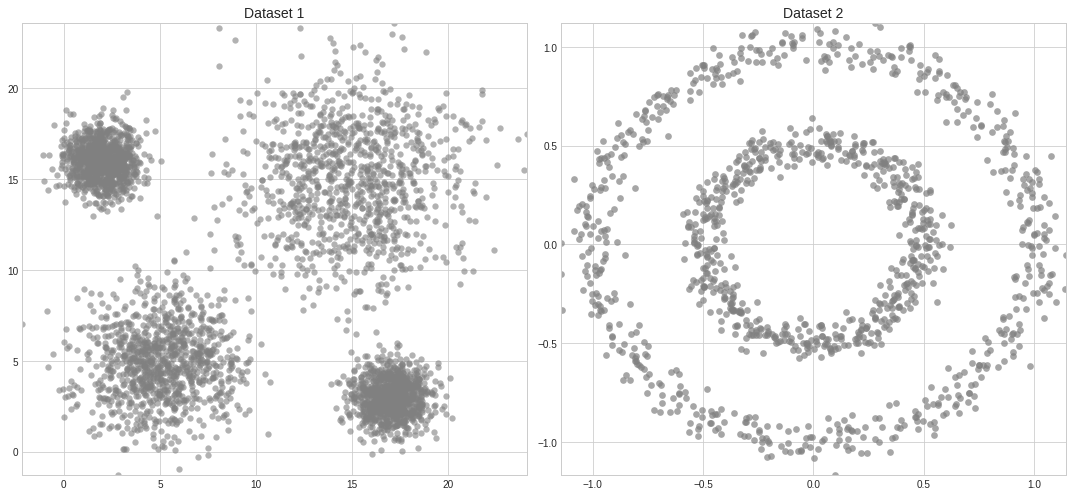

In [ ]:
# generated data
viz_plots(dataset1, dataset2)

Dataset1: 
32 noise points out of 4000 data points
Dataset2: 
7 noise points out of 1200 data points


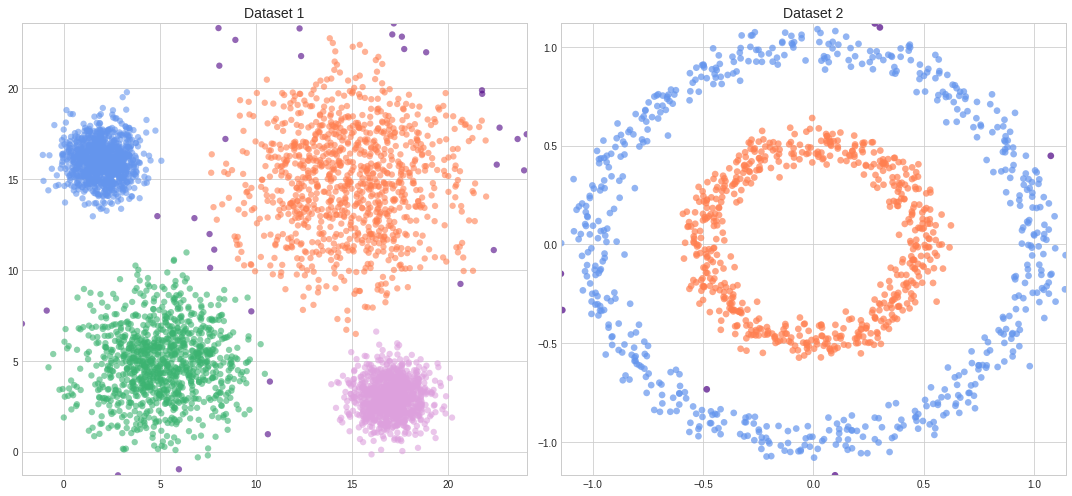

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [ ]:
# DBSCAN 

data1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
data2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
# noise points are assigned -1

print(f'Dataset1: \n{sum(data1==-1)} noise points out of {len(data1)} data points')
print(f'Dataset2: \n{sum(data2==-1)} noise points out of {len(data2)} data points')
viz_plots(dataset1, dataset2, data1, data2)
%time

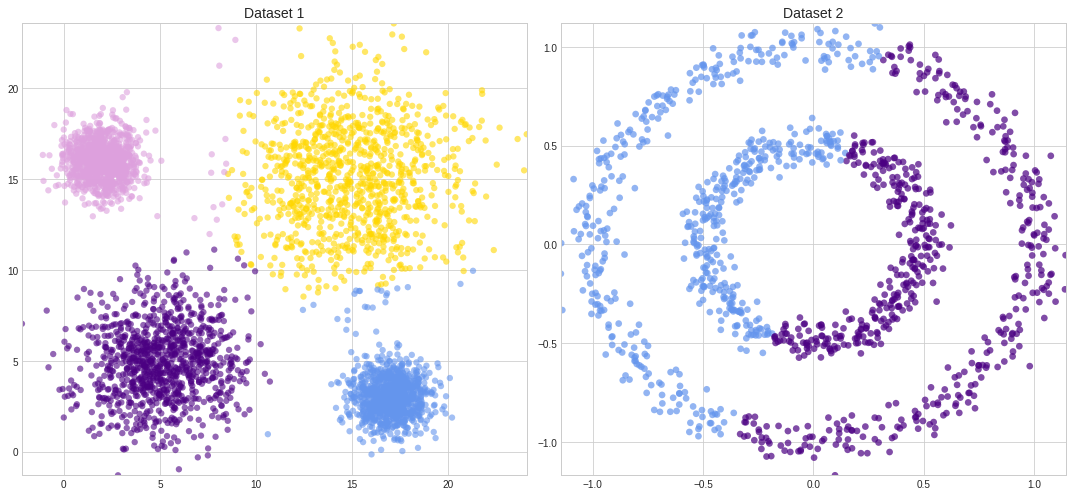

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [ ]:
# implementing k-means clustering
kmeans1 = cluster.KMeans(n_clusters=4, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset1)
kmeans2 = cluster.KMeans(n_clusters=2, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset2)

viz_plots(dataset1, dataset2, kmeans1, kmeans2)
%time

### Iris Data

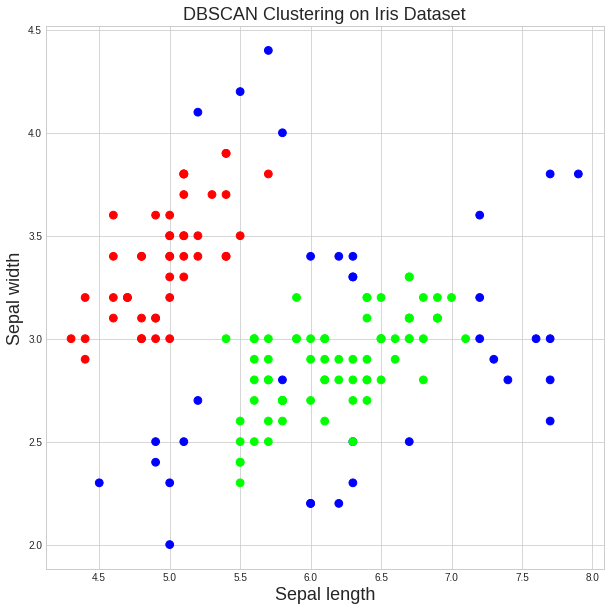

In [ ]:
# imported data for graphing - UCI Iris
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
UCI = iris.data; data = pd.DataFrame(UCI)
cor = data.corr()

# standarize features
scaler = StandardScaler()
UCI_std = scaler.fit_transform(UCI)

# Conduct DBSCAN Clustering (SKLEARN)
clt = DBSCAN()
    
# Train model
model = clt.fit(UCI_std)

# Predict clusters
clusters = pd.DataFrame(model.fit_predict(UCI_std))
data['Cluster'] = clusters

# Visualise cluster membership
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data['Cluster'], cmap='brg', s=60)
ax.set_title('DBSCAN Clustering on Iris Dataset', fontsize=18)
ax.set_xlabel('Sepal length', fontsize=18)
ax.set_ylabel('Sepal width', fontsize=18)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

X = iris.data[:, :2]
y = iris.target

# fitting K-Means on Irises

km = KMeans(n_clusters = 3, n_jobs = 4, random_state=13)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=13, tol=0.0001, verbose=0)

In [ ]:
print(km.cluster_centers_)

[[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


Text(0.5, 1.0, 'K-Means')

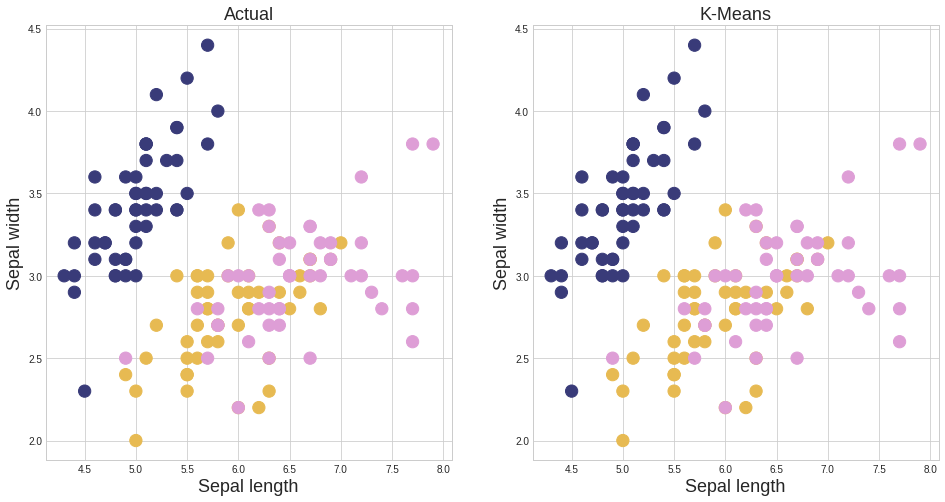

In [ ]:
# actual data vs kmeans

# set labels for clusters
set_labels = km.labels_

#create figure
#fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='#', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Actual', fontsize=18)

axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b',s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].set_title('K-Means', fontsize=18)

Text(0.5, 1.0, 'DBSCAN')

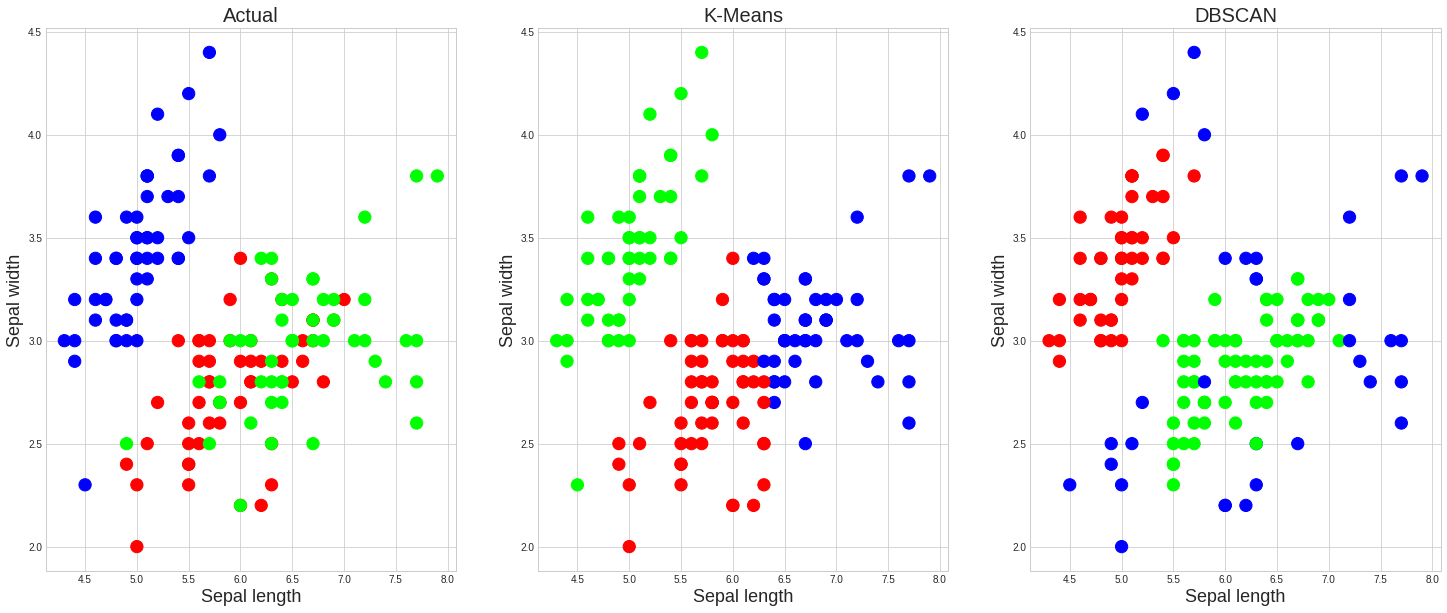

In [ ]:
# actual data vs K-Means vs DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(25,10))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='brg', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].set_title('Actual', fontsize=20)

axes[1].scatter(X[:, 0], X[:, 1], c=set_labels, cmap='brg',s=150)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].set_title('K-Means', fontsize=20)

axes[2].scatter(data[0],data[1], c=data['Cluster'], cmap='brg', s=150)
axes[2].set_xlabel('Sepal length', fontsize=18)
axes[2].set_ylabel('Sepal width', fontsize=18)
axes[2].set_title('DBSCAN', fontsize=20)